# MixUp

In [2]:
from PIL import Image
import os
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img_folder = 'images'
imgs = os.listdir(img_folder)
batch_x = [Image.open(os.path.join(img_folder, p)).resize((224, 224)) for p in imgs[0:10]]

In [ ]:
batch_x[0]

In [17]:
def normalize_image(X):
    X = X / np.max(X)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return (X - mean) / std  

In [18]:
def denormalize_image(X):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    X = std * X + mean
    X = np.clip(X, 0, 1)
    return X

In [31]:
lam = 0.75
batch_size = len(batch_x)
current_image = normalize_image(np.array(batch_x[0]))
random_index = randint(0, batch_size - 1)
random_image_from_batch = normalize_image(np.array(batch_x[random_index]))

(-0.5, 223.5, 223.5, -0.5)

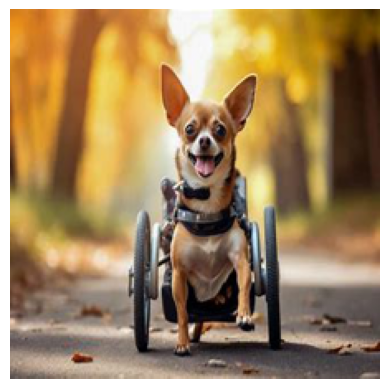

In [32]:
plt.imshow(denormalize_image(current_image))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

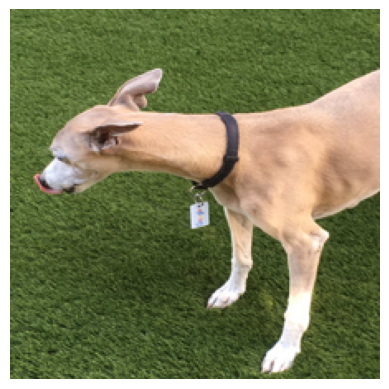

In [33]:
plt.imshow(denormalize_image(random_image_from_batch))
plt.axis("off")

In [34]:
mixed_image = lam * current_image + (1 - lam) * random_image_from_batch

(-0.5, 223.5, 223.5, -0.5)

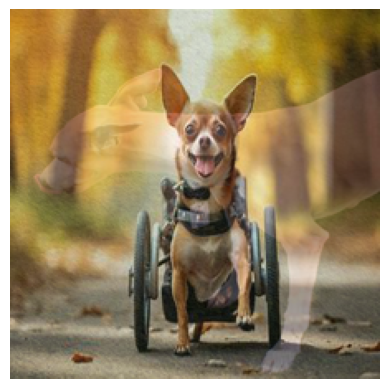

In [35]:
plt.imshow(denormalize_image(mixed_image))
plt.axis("off")